Zadanie 2

Symulowanie rozkładu normalnego metodą odwrotnej dystrybuanty.

In [5]:
import random
import numpy as np
import math
from scipy.special import erfinv
import matplotlib.pyplot as plt
from scipy.stats import norm
import seaborn as sns
import time

In [3]:

def norm_inv_cdf(num,mi, sig):
    sample = np.random.rand(num)
    return mi + sig * math.sqrt(2) * erfinv(2 * sample - 1)

In [6]:
mi = 0
sigma = 1
n_norm = 10000
ts = np.linspace(-4,4, 1000)

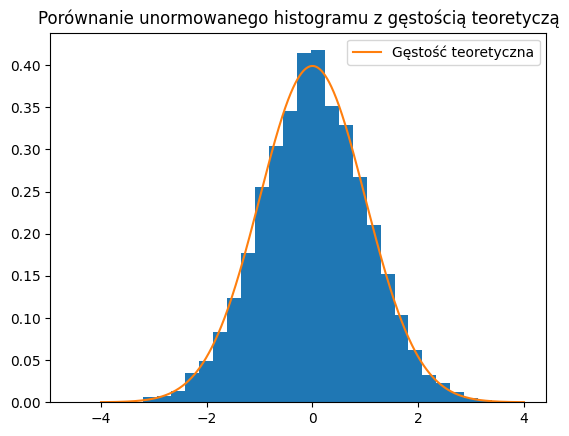

In [5]:
sample_inv_cdf = norm_inv_cdf(n_norm, mi, sigma)
plt.hist(sample_inv_cdf, density=True, bins=30)
plt.plot(ts, norm.pdf(ts, mi, 1/sigma), label = "Gęstość teoretyczna")
plt.legend(loc="best")
plt.title("Porównanie unormowanego histogramu z gęstością teoretyczą")
plt.show()

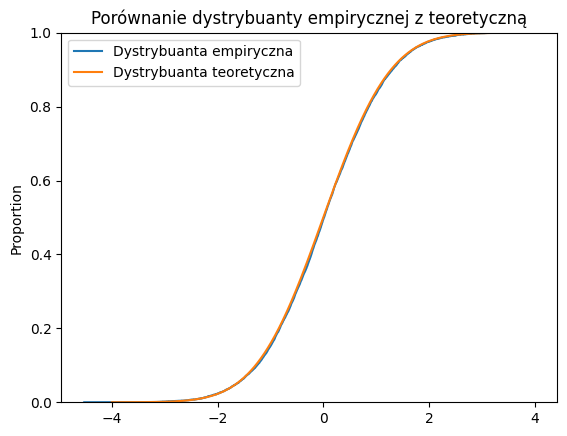

In [6]:
sns.ecdfplot(sample_inv_cdf, label = "Dystrybuanta empiryczna")
plt.plot(ts, norm.cdf(ts, mi, 1/sigma), label="Dystrybuanta teoretyczna")
plt.legend(loc="best")
plt.title("Porównanie dystrybuanty empirycznej z teoretyczną")
plt.show()

In [7]:
def exp_simulation(num, lambda_):
    sample = np.random.rand(num)
    return (-1)/lambda_ * np.log(1-sample)

In [8]:
def norm_using_exp(n, mi, sigma):
    samples = []
    sigmas = [sigma] * n
    mis = [mi] * n
    while len(samples) < n:
        y = exp_simulation(1,1)[0]
        u = np.random.uniform()
        if u <= np.exp(-(y-1)**2/2):
            u2 = np.random.uniform()
            if u2 < 0.5:
                samples.append(y)
            else:
                samples.append(-y)
    return np.add(np.multiply(samples,sigmas), mis)
    

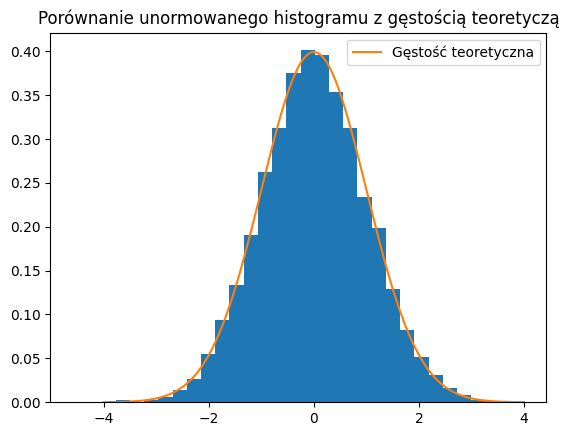

In [9]:
sample_using_exp = norm_using_exp(n_norm, mi, 1/sigma)
plt.hist(sample_using_exp, density=True, bins=30)
plt.plot(ts, norm.pdf(ts, mi, 1/sigma), label = "Gęstość teoretyczna")
plt.legend(loc="best")
plt.title("Porównanie unormowanego histogramu z gęstością teoretyczą")
plt.show()

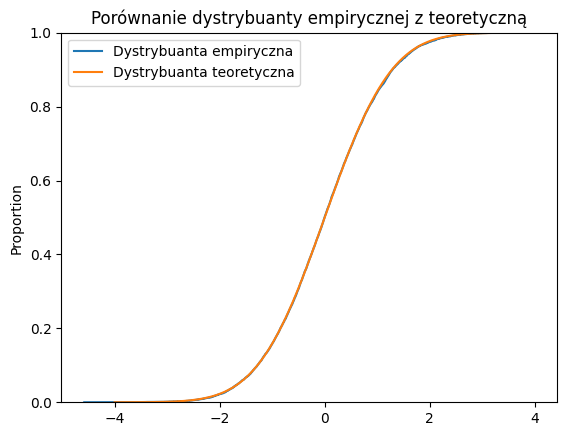

In [10]:
sns.ecdfplot(sample_using_exp, label = "Dystrybuanta empiryczna")
plt.plot(ts, norm.cdf(ts, mi, 1/sigma), label="Dystrybuanta teoretyczna")
plt.legend(loc="best")
plt.title("Porównanie dystrybuanty empirycznej z teoretyczną")
plt.show()

In [11]:
def ratio_of_uniforms(n,mi, sigma):
    lista_x = []
    lista_y = []
    sigmas = [1/sigma] * n
    mis = [mi] * n
    while len(lista_x) < n:
        x_losowy = random.uniform(0,1)
        y_losowy = random.uniform(-1,1)
        if -2*x_losowy*np.sqrt((-1)*np.log(x_losowy))<y_losowy<2*x_losowy*np.sqrt((-1)*np.log(x_losowy)):
            lista_x.append(x_losowy)
            lista_y.append(y_losowy)
    arr1 = np.array(lista_x)
    arr2 = np.array(lista_y)
    odp = arr2/arr1
    return np.add(np.multiply(odp,sigmas), mis)


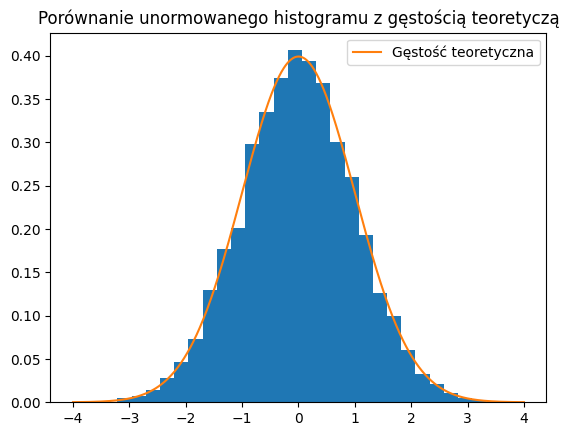

In [12]:
sample_ratio_of_uni = ratio_of_uniforms(n_norm,mi, sigma)
plt.hist(sample_ratio_of_uni, density=True, bins=30)
plt.plot(ts, norm.pdf(ts, mi, 1/sigma), label = "Gęstość teoretyczna")
plt.legend(loc="best")
plt.title("Porównanie unormowanego histogramu z gęstością teoretyczą")
plt.show()

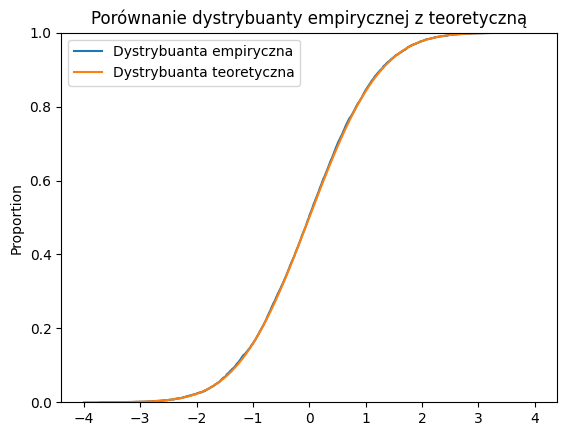

In [13]:
sns.ecdfplot(sample_ratio_of_uni, label = "Dystrybuanta empiryczna")
plt.plot(ts, norm.cdf(ts, mi, 1/sigma), label="Dystrybuanta teoretyczna")
plt.legend(loc="best")
plt.title("Porównanie dystrybuanty empirycznej z teoretyczną")
plt.show()

In [14]:
def box_muller(n, mu, sigma):
    m1 = [mu] * n
    s1 = [sigma] * n
    samples = []
    while len(samples) < n:
        u = np.random.random()
        v = np.random.random()
        r = np.sqrt(-2 * np.log(u))
        theta = 2 * np.pi * v
        samples.append(r * np.cos(theta))
        samples.append(r * np.sin(theta))
    return np.add(np.multiply(samples, s1), m1)

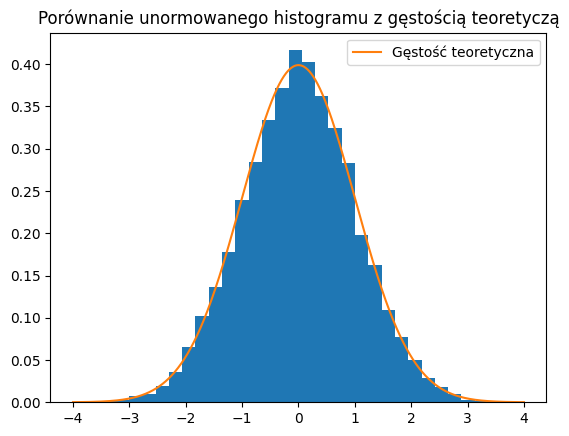

In [15]:
sample_box_muller = box_muller(n_norm, mi, sigma)
plt.hist(sample_box_muller, density=True, bins=30)
plt.plot(ts, norm.pdf(ts, mi, 1/sigma), label = "Gęstość teoretyczna")
plt.legend(loc="best")
plt.title("Porównanie unormowanego histogramu z gęstością teoretyczą")
plt.show()

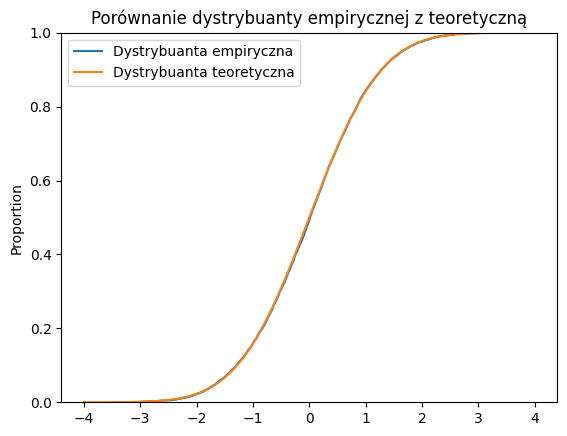

In [16]:
sns.ecdfplot(sample_box_muller, label = "Dystrybuanta empiryczna")
plt.plot(ts, norm.cdf(ts, mi, 1/sigma), label="Dystrybuanta teoretyczna")
plt.legend(loc="best")
plt.title("Porównanie dystrybuanty empirycznej z teoretyczną")
plt.show()

In [17]:
def marsaglia(n, mi, sigma):
    sigmas = [sigma] * n
    mis = [mi] * n
    samples = []
    while len(samples) < n:
        y1, y2 = np.random.uniform(-1,1,2)
        r = y1**2 + y2**2
        if r < 1:
            y = np.sqrt(-2*np.log(r)/r)
            x1, x2 = y1 * y, y2 * y
            samples.append(x1)
            samples.append(x2)
    return np.add(np.multiply(samples,sigmas), mis)

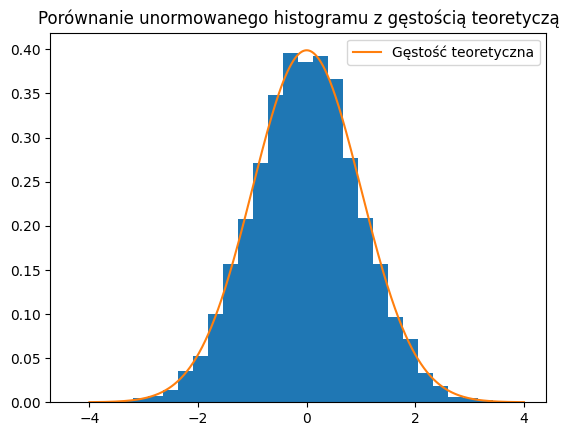

In [18]:
sample_marsaglia = marsaglia(n_norm, mi, sigma)
plt.hist(sample_marsaglia, density=True, bins=30)
plt.plot(ts, norm.pdf(ts, mi, 1/sigma), label = "Gęstość teoretyczna")
plt.legend(loc="best")
plt.title("Porównanie unormowanego histogramu z gęstością teoretyczą")
plt.show()

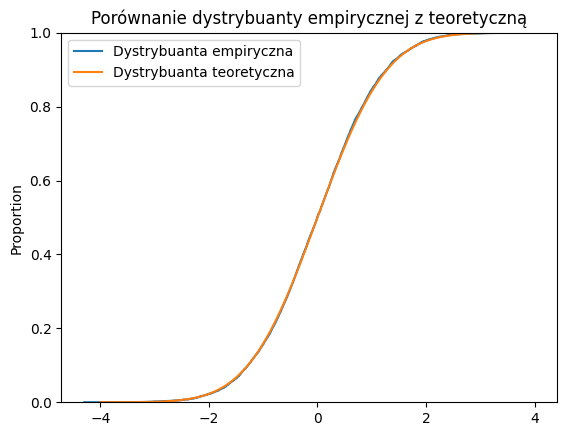

In [19]:
sns.ecdfplot(sample_marsaglia, label = "Dystrybuanta empiryczna")
plt.plot(ts, norm.cdf(ts, mi, 1/sigma), label="Dystrybuanta teoretyczna")
plt.legend(loc="best")
plt.title("Porównanie dystrybuanty empirycznej z teoretyczną")
plt.show()

Metoda "tuzina"

In [20]:
def dozen(n, mi, sigma):
    s = [np.sum(np.random.rand(12)) for i in range(n)]
    xs = np.subtract(s, 6*np.ones(n))
    ys = np.add(np.multiply(xs, sigma*np.ones(n)), mi*np.ones(n))
    return ys

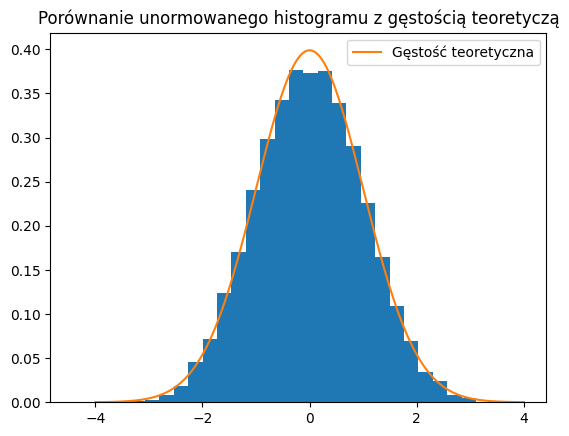

In [21]:
sample_dozen = dozen(n_norm, mi, sigma)
plt.hist(sample_dozen, density=True, bins=30)
plt.plot(ts, norm.pdf(ts, mi, 1/sigma), label = "Gęstość teoretyczna")
plt.legend(loc="best")
plt.title("Porównanie unormowanego histogramu z gęstością teoretyczą")
plt.show()

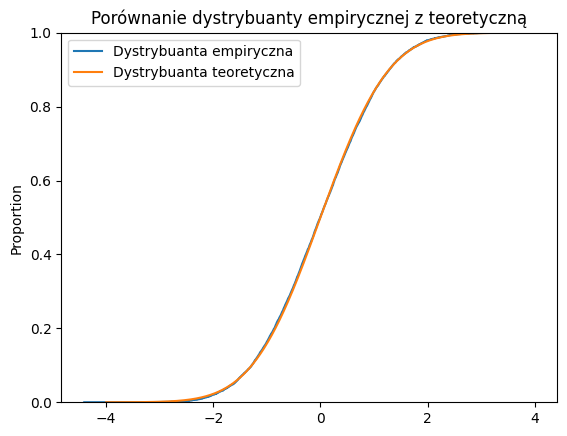

In [22]:
sns.ecdfplot(sample_dozen, label = "Dystrybuanta empiryczna")
plt.plot(ts, norm.cdf(ts, mi, 1/sigma), label="Dystrybuanta teoretyczna")
plt.legend(loc="best")
plt.title("Porównanie dystrybuanty empirycznej z teoretyczną")
plt.show()

Ziggurat

In [1]:
r = 3.442619855899
v = 9.91256303526217e-3

In [2]:
def layers(n=256):
    r = 3.442619855899
    v = 9.91256303526217e-3
    xs, ys = np.zeros(n + 1), np.zeros(n)
    xs[0] = r
    xs[-1] = 0

    for i in range(1, n):
        xs[i] = np.sqrt(-2 * np.log(v / xs[i - 1] + np.exp(-0.5 * xs[i - 1]**2)))

    ys = np.exp(-0.5 * xs**2)
    return xs, ys

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def ziggurat(num, xs, ys):
    n = len(xs) - 1
    sample = np.zeros(num)
    exp_counter = 0
    ind = 0
    while ind < num:
        while True:
            i = np.random.randint(0, n)
            u = np.random.uniform(-1, 1)
            x = u * xs[i]
            if np.abs(u) < ys[i] / ys[i + 1]:
                sample[ind] = x
                ind += 1
                break
            if i == 0:
                while True:
                    u1, u2 = np.random.rand(2)
                    x = -np.log(u1) / r
                    y = -np.log(u2)
                    exp_counter += 2
                    if 2 * y > x**2:
                        if u < 0:
                            sample[ind] = x  
                            ind += 1
                            break
                        else:
                            sample[ind] = -x  
                            ind += 1
                            break
                break
            u1 = np.random.uniform()
            y = ys[i] + u1 * (ys[i + 1] - ys[i])
            exp_counter += 1
            if np.random.uniform() < np.exp(-0.5 * x**2) / y:
                sample[ind] = x
                ind += 1
                break
    return sample, exp_counter



C:\Users\Rafal\AppData\Local\Temp\ipykernel_19972\2224126159.py:9: RuntimeWarning: invalid value encountered in sqrt
  xs[i] = np.sqrt(-2 * np.log(v / xs[i - 1] + np.exp(-0.5 * xs[i - 1]**2)))


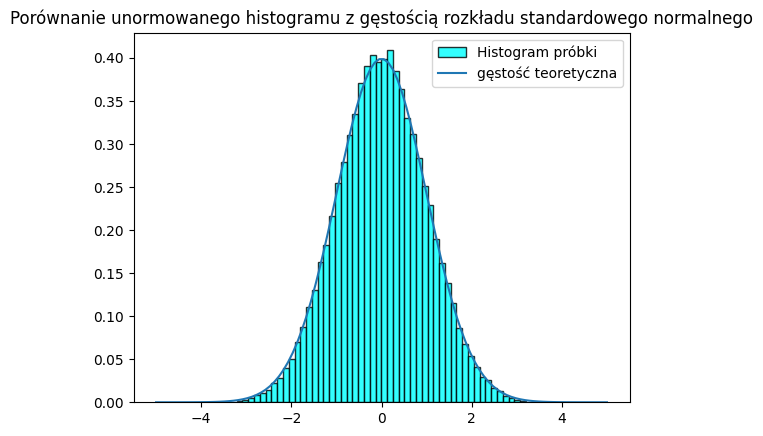

In [13]:
xs_, ys_ = layers()
sam = ziggurat(100000, xs_, ys_)[0]
xs = np.linspace(-5,5, 100)
plt.hist(sam, bins=50, density=True, alpha=0.8, color='cyan', edgecolor='black', label="Histogram próbki")
plt.plot(xs, norm.pdf(xs, 0, 1), label="gęstość teoretyczna")
plt.title("Porównanie unormowanego histogramu z gęstością rozkładu standardowego normalnego")
plt.legend(loc='best')
plt.show()

Metoda ilorazowa

In [32]:
def iloraz(n, mi, sigma):
    ys = np.zeros(n)
    i = 0
    while i < n:
        u1, u2 = np.random.rand(2)
        u, e = u1, np.exp(1)
        v = -np.sqrt(2/e) + 2*np.sqrt(2/e) * u2
        x = v/u
        if x**2 <= 2*(3 - u*(4 + u)):
            ys[i] = sigma * x + mi
            i += 1
        elif x**2 <= 2/u - 2*u and x**2 <= -4 * np.log(u):
            ys[i] = sigma * x + mi
            i += 1
    return ys
        

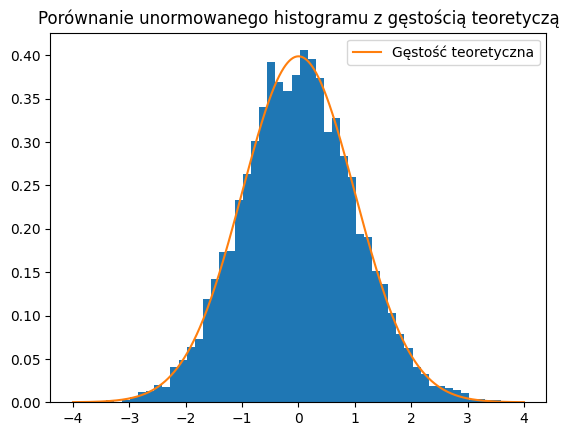

In [33]:
sample_iloraz = iloraz(10000, mi, sigma)
plt.hist(sample_iloraz, density=True, bins=50)
plt.plot(ts, norm.pdf(ts, mi, 1/sigma), label = "Gęstość teoretyczna")
plt.legend(loc="best")
plt.title("Porównanie unormowanego histogramu z gęstością teoretyczą")
plt.show()

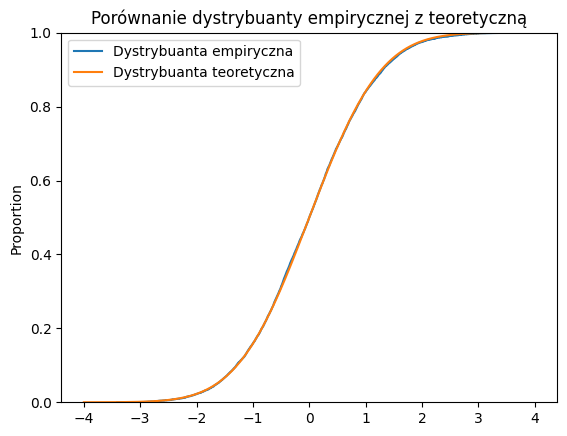

In [34]:
sns.ecdfplot(sample_iloraz, label = "Dystrybuanta empiryczna")
plt.plot(ts, norm.cdf(ts, mi, 1/sigma), label="Dystrybuanta teoretyczna")
plt.legend(loc="best")
plt.title("Porównanie dystrybuanty empirycznej z teoretyczną")
plt.show()

In [35]:
def levy(n, mi, sigma):
    ys = np.zeros(n)
    i = 0
    while i < n:
        e = np.exp(1)
        a = 0.196
        b = 0.25472
        ss = 0.449871
        t = -0.386595
        u1, u2 = np.random.rand(2)
        u = u1
        v = -np.sqrt(2/e) + 2*u2*np.sqrt(2/e)
        x = u - ss
        y = np.absolute(v) - t
        q = x**2 + y*(a*y - b*x)
        if q < 0.27597:
            if v/u != 0:
                X = v/u
                ys[i] = sigma * X + mi
                i += 1
        elif q > 0.27846:
            continue
        elif np.abs(v) <= 4 * u:
            continue
        elif v / u == 0:
            continue
        else:
            if v/u != 0:
                X = v/u
                ys[i] = sigma * X + mi
                i += 1
    return ys

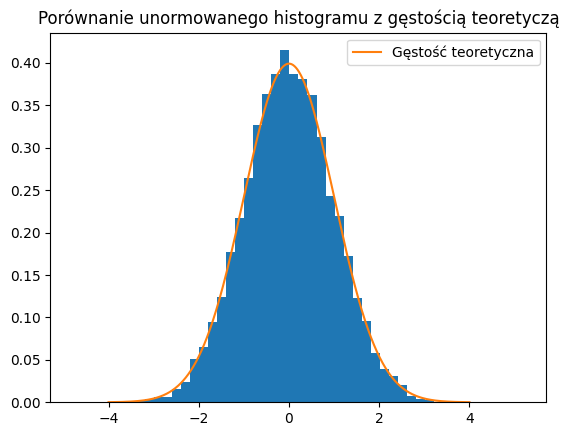

In [36]:
sample_levy = levy(n_norm, mi, sigma)
plt.hist(sample_levy, density=True, bins=50)
plt.plot(ts, norm.pdf(ts, mi, 1/sigma), label = "Gęstość teoretyczna")
plt.legend(loc="best")
plt.title("Porównanie unormowanego histogramu z gęstością teoretyczą")
plt.show()

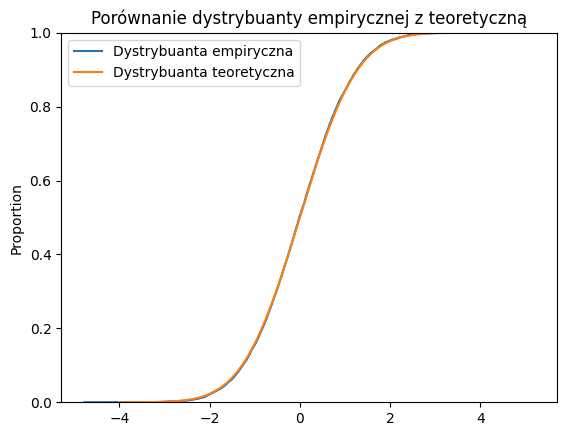

In [41]:
sns.ecdfplot(sample_levy, label = "Dystrybuanta empiryczna")
plt.plot(ts, norm.cdf(ts, mi, 1/sigma), label="Dystrybuanta teoretyczna")
plt.legend(loc="best")
plt.title("Porównanie dystrybuanty empirycznej z teoretyczną")
plt.show()

Metoda Ahrensa-Dietera

In [42]:
def ahrens_dieter(n, mi, sigma):
    ys = np.zeros(n)
    i = 0
    while i < n-2:
        u1, u2, u3 = np.random.rand(3)
        if u1 < 0.5:
            a = 1
        else:
            a = -1
        b = -np.log(u2)
        c = np.tan(np.pi*(u3 - 0.5))
        d = np.sqrt(2*b/(1+c**2))
        x1,x2 = a*d, c*d
        y1, y2 = sigma * x1 + mi, sigma * x2 + mi
        ys[i], ys[i+1] = y1, y2
        i += 1
    return ys

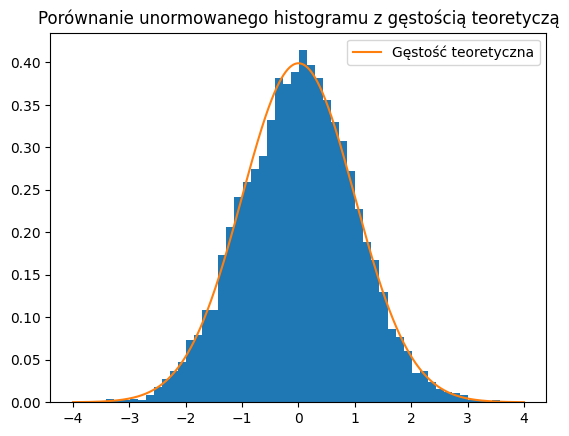

In [43]:
sample_ahrens_dieter = ahrens_dieter(n_norm, mi, sigma)
plt.hist(sample_ahrens_dieter, density=True, bins=50)
plt.plot(ts, norm.pdf(ts, mi, 1/sigma), label = "Gęstość teoretyczna")
plt.legend(loc="best")
plt.title("Porównanie unormowanego histogramu z gęstością teoretyczą")
plt.show()

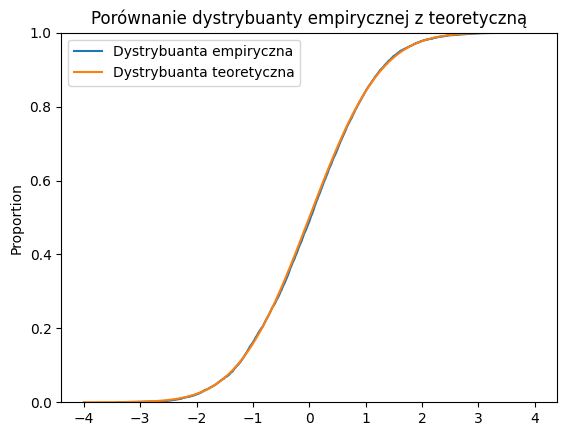

In [44]:
sns.ecdfplot(sample_ahrens_dieter, label = "Dystrybuanta empiryczna")
plt.plot(ts, norm.cdf(ts, mi, 1/sigma), label="Dystrybuanta teoretyczna")
plt.legend(loc="best")
plt.title("Porównanie dystrybuanty empirycznej z teoretyczną")
plt.show()

Metoda Granda

In [59]:
def grand(n, mi, sigma):
    ys = np.zeros(n)
    ind = 0
    while ind < n:
        u1,u2,u3,u4,u5,u6 = np.random.rand(6)
        a = u1
        i = 0
        while a < 0.5:
            a *= 2
            i += 1
        t_i = norm.ppf(1 - 2**(-i-1))
        t_i1 = norm.ppf(1 - 2**(-(i+1)-1))
        u = (t_i1 - t_i) * u2
        v = u * (0.5 * u + t_i)
        if v < u6:
            if u4 < 0.5:
                X = t_i + u
            else:
                X = -t_i - u
            ys[ind] = sigma * X + mi
            ind += 1
    return ys


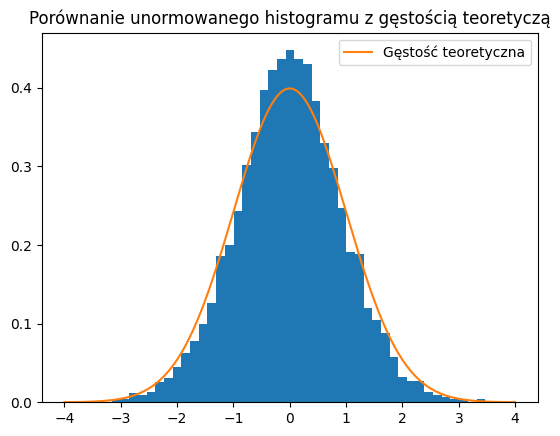

In [60]:
sample_grand = grand(10000, mi, sigma)
plt.hist(sample_grand, density=True, bins=50)
plt.plot(ts, norm.pdf(ts, mi, 1/sigma), label = "Gęstość teoretyczna")
plt.legend(loc="best")
plt.title("Porównanie unormowanego histogramu z gęstością teoretyczą")
plt.show()

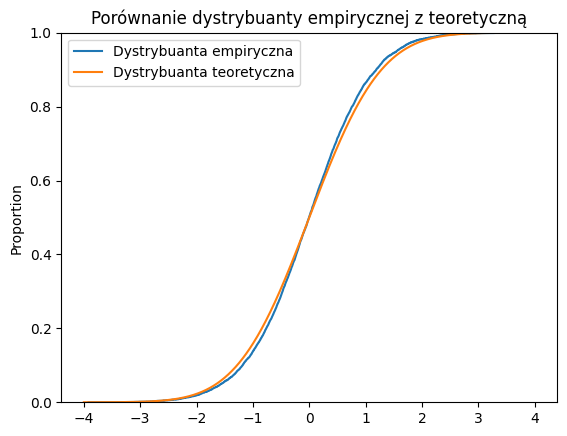

In [61]:
sns.ecdfplot(sample_grand, label = "Dystrybuanta empiryczna")
plt.plot(ts, norm.cdf(ts, mi, 1/sigma), label="Dystrybuanta teoretyczna")
plt.legend(loc="best")
plt.title("Porównanie dystrybuanty empirycznej z teoretyczną")
plt.show()

In [19]:

def time_check(func, ns, mi, sigma):
    times = np.zeros(len(ns))
    if func.__name__ == "ziggurat":
        for i in range(len(ns)):
            start = time.time()
            ziggurat(ns[i], xs_, ys_)
            end = time.time()
            times[i] = end - start
    else:
        for i in range(len(ns)):
            start = time.time()
            func(ns[i], mi, sigma)
            end = time.time()
            times[i] = end - start
    return times

In [10]:
ns = np.linspace(1000, 10000, 10).astype(int)

In [20]:
times_inv_cdf = time_check(norm_inv_cdf, ns, mi, sigma)
times_using_exp = time_check(norm_using_exp, ns, mi, sigma)
times_ratio_of_uniforms = time_check(ratio_of_uniforms, ns, mi, sigma)
times_ziggurat = time_check(ziggurat, ns, mi, sigma)
times_box_muller = time_check(box_muller, ns, mi, sigma)
times_marsaglia = time_check(marsaglia, ns, mi, sigma)
times_dozen = time_check(dozen, ns, mi, sigma)

'times_box_muller = time_check(box_muller, ns, mi, sigma)\ntimes_marsaglia = time_check(marsaglia, ns, mi, sigma)\ntimes_dozen = time_check(dozen, ns, mi, sigma)'

In [22]:
plt.figure(figsize=(15,9))
plt.plot(ns, times_inv_cdf, c="g", label="Odwrotna dystrybuanta")
plt.plot(ns, times_using_exp, c="r", label="Z rozkładu wykładniczego")
plt.plot(ns, times_ratio_of_uniforms, c="b", label="Stosunek jednostajnych")
plt.plot(ns, times_ziggurat, c="olive", label="ziggurat")
plt.plot(ns, times_box_muller, c="orange", label="Box-Muller")
plt.plot(ns, times_marsaglia, c="pink", label="Marsaglia")
plt.plot(ns, times_dozen, c="brown", label="Tuzin")
plt.ylabel("Czasy wykonania")
plt.xlabel("Długość generowanej próbki")
plt.title("Porównanie czasów różnych metod generowania r. normalnego")
plt.legend(loc="best")
plt.show()


NameError: name 'times_inv_cdf' is not defined

<Figure size 1500x900 with 0 Axes>